<a href="https://colab.research.google.com/github/LuckyTiwari007/Play_store_data_review/blob/main/Play_store_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Play store data review EDA Project**

Desige by Lucky Tiwari



In [1]:
#Import Necceary Liabory
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
# word cloud library
from wordcloud import WordCloud

In [2]:
from google.colab import drive

df=pd.read_csv('/content/Play Store Data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### **1)  All over appication category and there valuues count**

In [5]:
#All Category of play store application
cat = df.Category.unique()
cat


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df[df['Category'] == '1.9'] #Know the column noumbers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# To remove the "1.9" may be it from rating
df.loc[10472] = df.loc[10472].shift()
df['App'].loc[10472] = df['Category'].loc[10472]
df['Category'].loc[10472] = np.nan
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

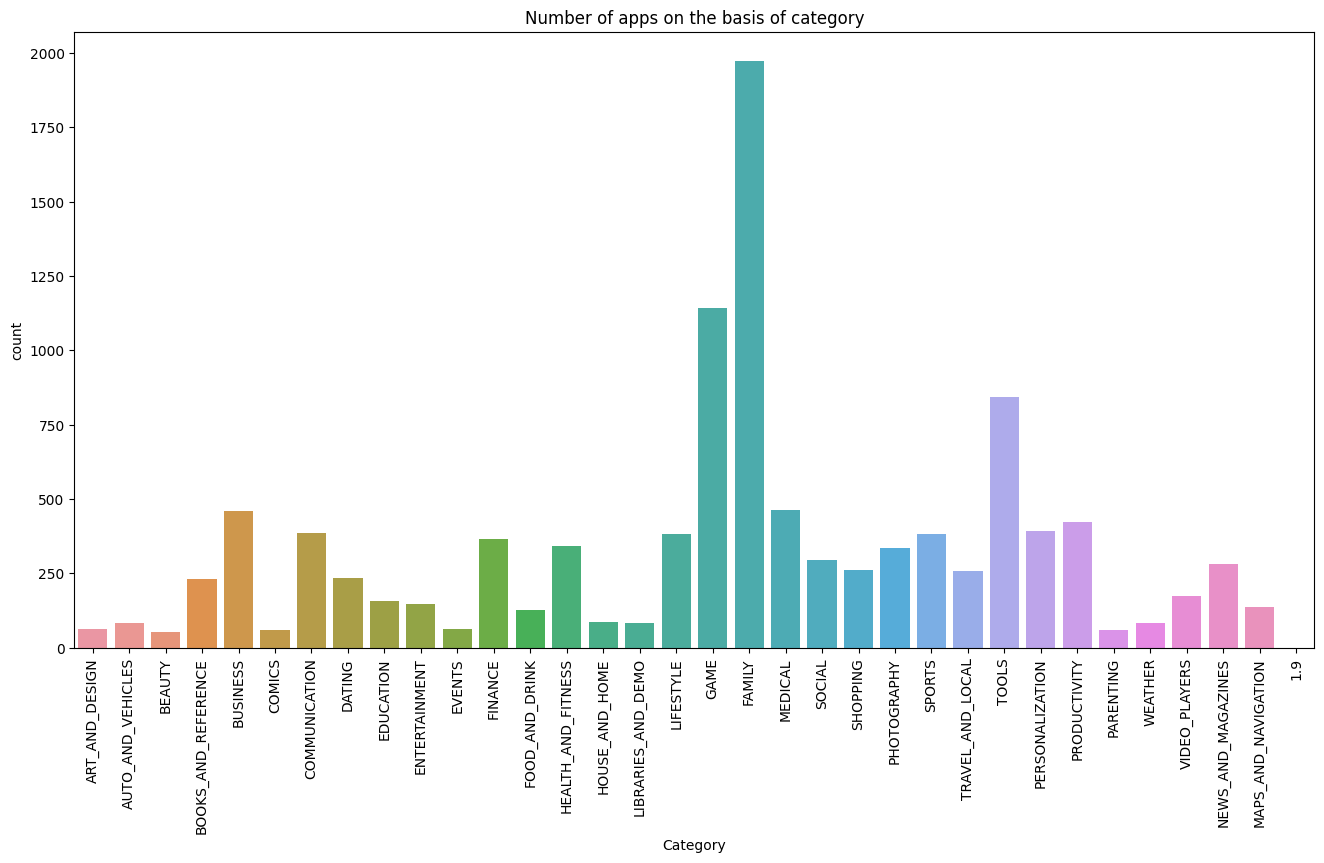

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Category',data = df)
plt.xticks(rotation=90)
plt.show()


## **2) What is the density of allover rating?**

In [ ]:
# Rating
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

<Axes: xlabel='Rating', ylabel='Density'>

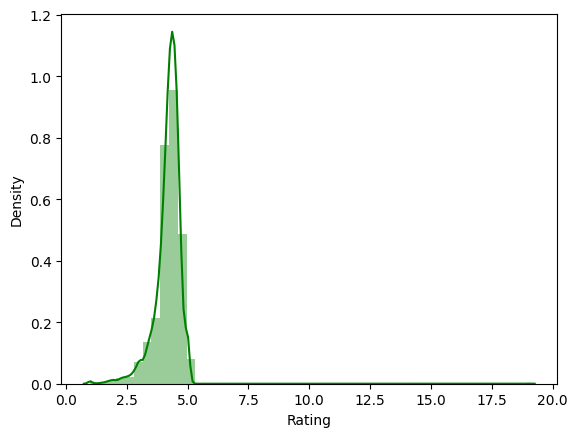

In [ ]:
#Density of rating
sns.distplot(df.Rating, color='green')

## **3) What is the aggregate rating of indiviual category ?**

<Axes: xlabel='Rating', ylabel='Category'>

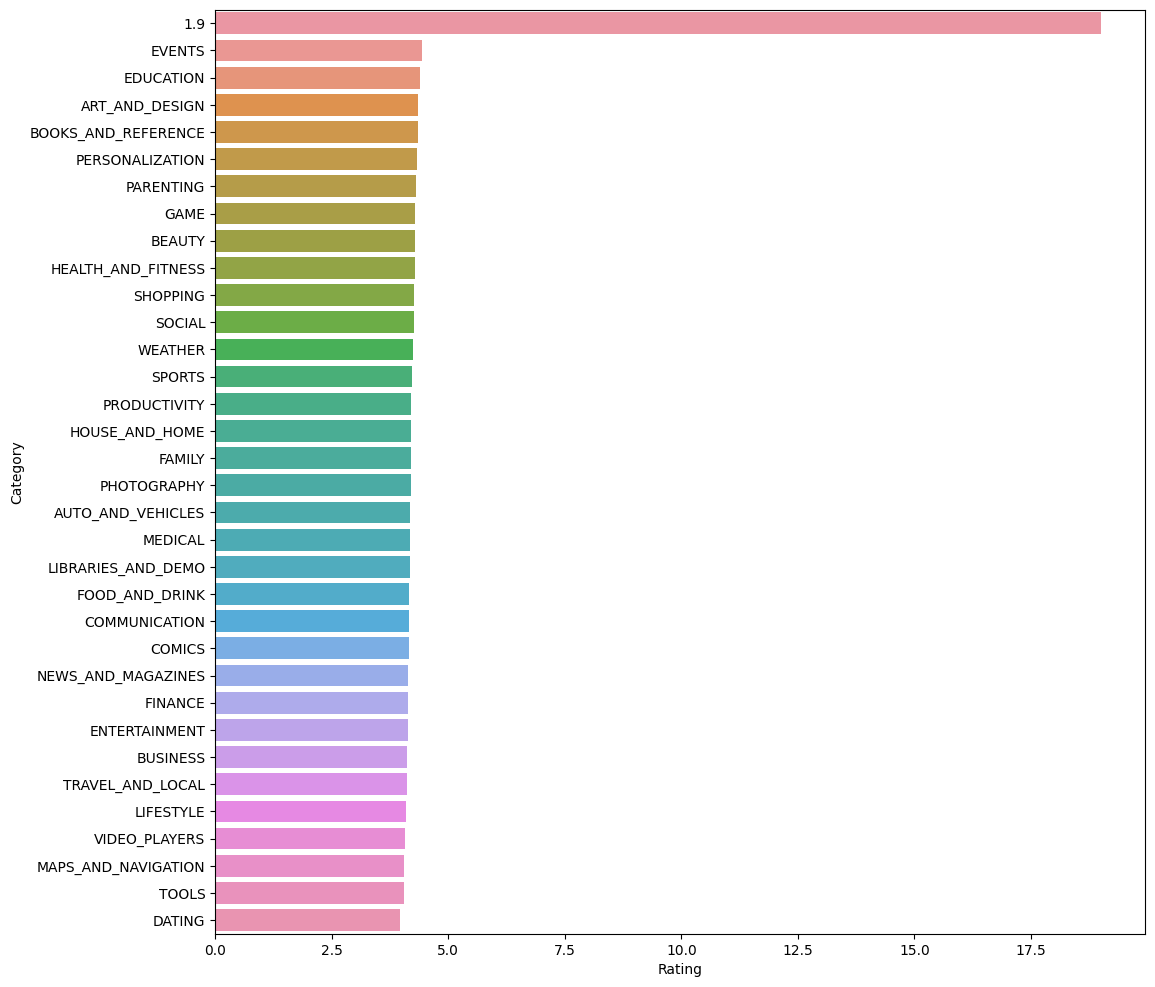

In [6]:

# Aggregate Rating
plt.figure(figsize=(12,12))
mean_rat=df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=df)

## **4) Show paid and Free category of each application .**

In [7]:
# There is 0 and nan valves, let's change them to free
df['Type'].replace(to_replace=['0'], value=['Free'], inplace=True)
df['Type'].fillna('Free', inplace=True)
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

Category           Type
1.9                Free      1
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 64, dtype: int64


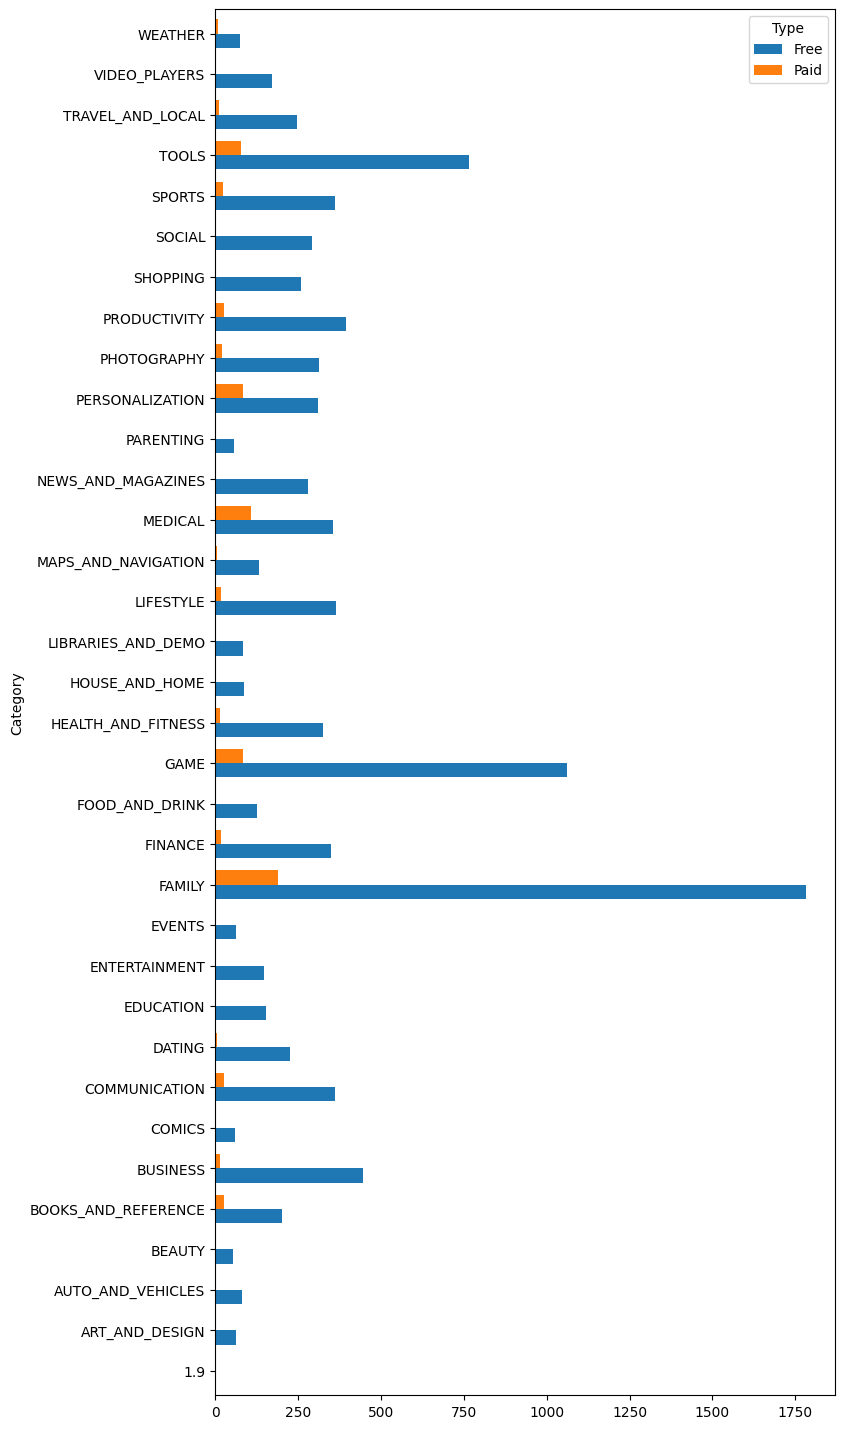

In [8]:
print(df.groupby('Category')['Type'].value_counts())
Type_cat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(8,18), width=0.7)
plt.show()

## **5) What is the overall percentage of paid and free appliction?**

In [9]:
df.Type.unique()
label =['Free','Paid']
paid_free= df['Type'].value_counts()
fig = px.pie(paid_free, values=df['Type'].value_counts().values, names=label,
             
             title='Paid & Free Games')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


### **6) Show the content rating of all.**

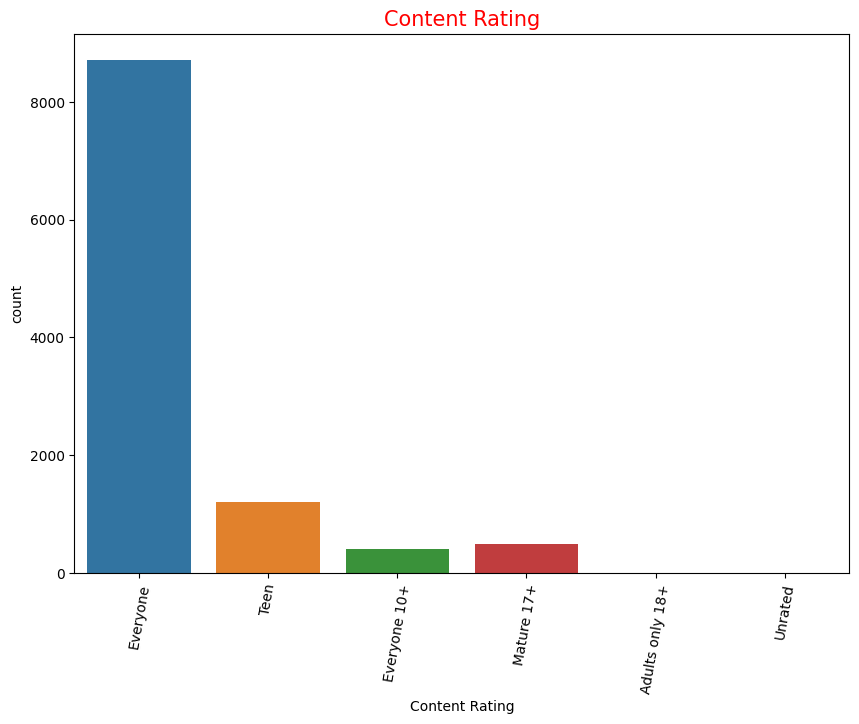

In [ ]:
#cantent rating according to particular age category
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'red',fontsize=15)
plt.show()

# **7) Show the Top 10 android app.**

In [ ]:
#Dataframe of apps on the basis of category
category = pd.DataFrame(df['Category'].value_counts())       
category.rename(columns = {'Category':'Count'},inplace=True)

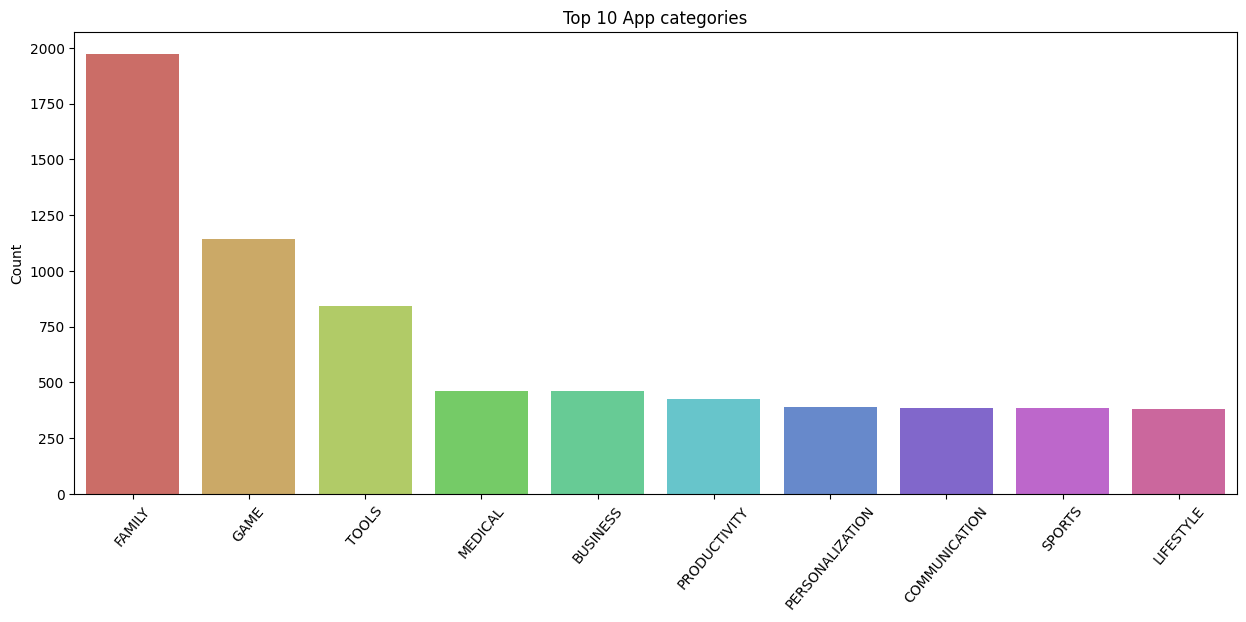

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=50)
plt.show()


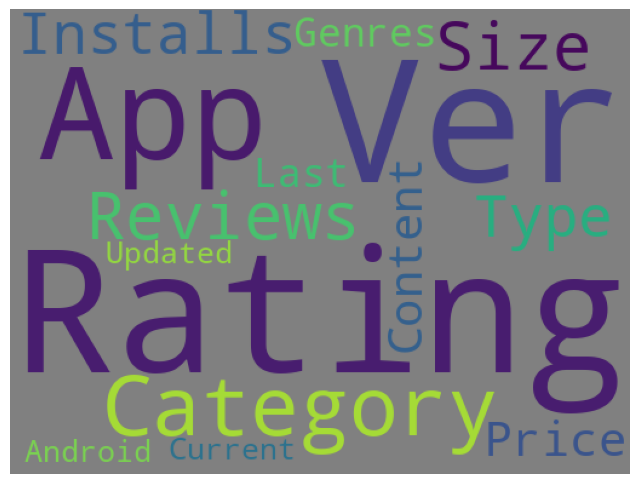

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='grey',
                          width=512,
                          height=384
                         ).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()